### Scenario

As one of the leading telco in the country, the company are proud to provide quality services that have been receiving satisfactory feedback from customers frequently. But from recent quarterly reports, there have been a drop in the customer base.
We are instructed by the management to create a model to predict if a customer will churn so that they are able to come up with solutions to keep hold of them.

### Objective
1. Understand the dataset
2. Perform data cleaning
3. Pre-process the dataset for our model 
4. Find the baseline of some models and choose the suitable model
5. Evaluate the final model selected

### Challenges
- Check if the dataset have duplicate data and missing values
- To decide on the encoding method for categorical features
- If  scaling is needed on the dataset
- What approach should we use if the dataset is imbalanced
- Since “Churn” (“Yes” or “No”) will be the label, our model will be a Supervised Classification Model. We will try a few models like Logistic Regression, Decision Trees, Random Forest, Support Vector Machine, Gradient Boost, XGBoost and select the best performed model for our problem
- Tune the hyperparameter of the selected model to improve the performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,\
precision_score, recall_score, accuracy_score, f1_score, log_loss
import warnings
warnings.filterwarnings('ignore')

### Data Cleaning

Import and understand the dataset.

In [77]:
df = pd.read_csv('Dataset_Chew Hock Boon.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [76]:
df.shape

(7043, 21)

There are 7043 rows and 21 features in our dataset. Check for any duplicate data.

In [4]:
print('Duplicated data:', df.duplicated().sum())

Duplicated data: 0


There are no duplicated data in the dataset. We will drop "customerID" from the dataset since it does not provide any useful information.

In [5]:
df.drop('customerID', axis=1, inplace=True)
df.shape

(7043, 20)

Check for any missing values.

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataset.

Take a look at the data type of each feature.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Convert "TotalCharges" from "object" to "float".

In [8]:
# df.TotalCharges.astype(float)
# df.TotalCharges.dtype

Seems like we have unexpected missing values (' ') in "TotalCharges". Let see if there are any more unexpected missing values in other "object" features.


In [9]:
for item in df.columns:
    if df[item].dtype == 'object':
        if item != 'TotalCharges':      # skip 'TotalCharges' since we already know there are unexpected missing values
            print(item, ':', df[item].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


There are no unexpected missing values in other "object" features. Now take a look at those data that contain the missing values (' ').

In [10]:
error = df.loc[df.TotalCharges == ' ']
error.T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [11]:
error.shape

(11, 20)

The feature "tenure" is all 0 which means all these data are new customers that is last then 1 month with the company. This explain why their "TotalCharges" are empty. Since there are only 11 rows out of the total dataset (7043 rows) and they are all under contract, we can just removed them from our dataset. 

In [12]:
df.drop(error.index, inplace=True)
df.shape

(7032, 20)

Now convert "TotalCharges".

In [13]:
df.TotalCharges = df.TotalCharges.astype(float)
df.TotalCharges.dtype

dtype('float64')

Take a look at the number of customers that stay or churn in each categorical feature.

In [14]:
cat_features = df.select_dtypes(include='object').columns

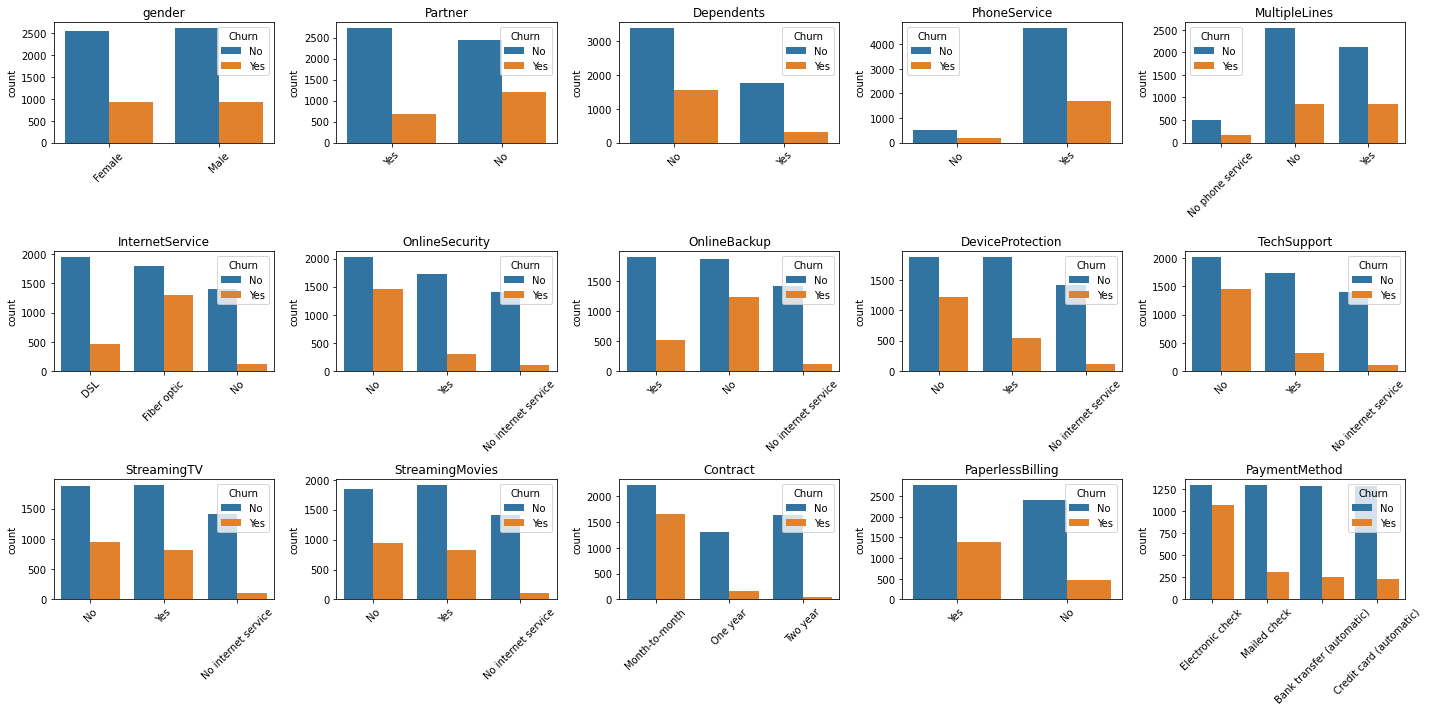

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,10))

for item, ax in zip(cat_features, axes.flatten()):
    if item != 'Churn':
        chart = sns.countplot(x=df[item], data=df, hue='Churn', ax=ax)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        chart.set(xlabel=None)
        chart.set_title(item)
plt.tight_layout()
plt.savefig('count.png')

Seems like there are some interesting insight from the count plot above:
- Gender does not affect whether the customer stay or churn - almost the same.
- Customers with partner and dependents tend to stay with the company - one payment for all?
- Customers with phone service churn more regardless of single or multiple line - prices?
- Customers using fiber optic churn more - again prices?
- Customers without online sercurity, online backup, device protection and tech support churn more - higher premium for these services?
- Having streaming package or not does not affect much to the rate of churn - almost the same.
- Customers without contract churn the most - **NEED TO TIE THEM DOWN!!!**
- Customers having paperless billing tend to churn more - mostly tech savvy so more easily to compare prices and services online. Younger generation?
- Customers using electronics check payment churn more than those using other payment methods - more troublesome?

Check for any outliers in "tenure", "MonthlyCharges" and "TotalCharges".

<AxesSubplot:xlabel='TotalCharges'>

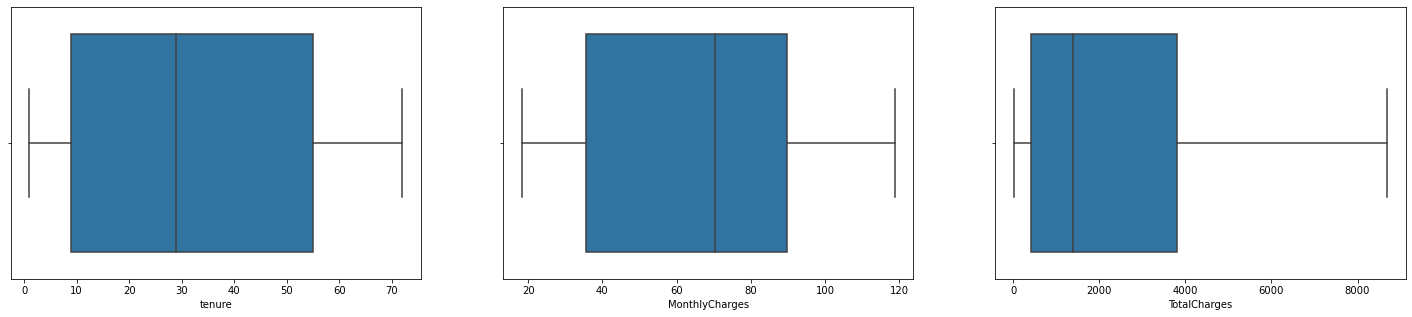

In [16]:
fig, axes =  plt.subplots(nrows=1, ncols=3, figsize=(25,5))
sns.boxplot(x=df.tenure, data=df, ax=axes[0])
sns.boxplot(x=df.MonthlyCharges, data=df, ax=axes[1])
sns.boxplot(x=df.TotalCharges, data=df, ax=axes[2])

No outliers found from the above boxplot.

Take a look at the distribution of "Churn".

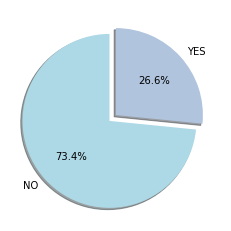

In [17]:
plt.pie(x=df.Churn.value_counts(), explode=(0.1, 0), labels=['NO', 'YES'], autopct='%.1f%%', startangle=90, shadow=True,
        colors=['lightblue','lightsteelblue'])
plt.show()

We have only 26.6% of rows that is "YES" (customers who churn). Our dataset is imbalanced.

### Data Preprocessing

Split the dataset into X (features) and y (label).

In [18]:
X = df.drop('Churn', axis=1)
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [19]:
y = df.Churn
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

Convert categorical features to numerical features.
- use dummies encoding for "gender", "Partner", "Dependents", "PhoneService" and "PaperlessBilling" as there are only 2 classes in these features.

In [20]:
X = pd.get_dummies(X, columns=["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"],
                   drop_first=True)
X.head().T

,0,1,2,3,4
SeniorCitizen,0,0,0,0,0
tenure,1,34,2,45,2
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No
DeviceProtection,No,Yes,No,Yes,No
TechSupport,No,No,No,Yes,No
StreamingTV,No,No,No,No,No
StreamingMovies,No,No,No,No,No


- use ordinal encoding for "Contract" as we want to rank the classes.

In [21]:
contract = [['Two year', 'One year', 'Month-to-month']]

encoder = OrdinalEncoder(contract)

X['contract'] = encoder.fit_transform(np.array(X.Contract).reshape(-1,1))


In [22]:
X.contract.head()

0    2.0
1    1.0
2    2.0
3    1.0
4    2.0
Name: contract, dtype: float64

- use frequency encoding for rest of the categorical features.

In [23]:
col_to_encode = X.select_dtypes(include='object').columns        # get the remaining  categorical features name
col_to_encode

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [24]:
for item in col_to_encode:
    if item != 'Contract':          # 'Contract already encoded'
        counts = X[item].value_counts()
        freq_enc = counts/len(X)
        X['enc_'+item] = X[item].map(freq_enc)

X.head().T

,0,1,2,3,4
SeniorCitizen,0,0,0,0,0
tenure,1,34,2,45,2
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No
DeviceProtection,No,Yes,No,Yes,No
TechSupport,No,No,No,Yes,No
StreamingTV,No,No,No,No,No
StreamingMovies,No,No,No,No,No


- Drop those encoded features.

In [25]:
X = X.drop(col_to_encode, axis=1)
X.head().T

,0,1,2,3,4
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,1.000000,34.000000,2.000000,45.000000,2.000000
MonthlyCharges,29.850000,56.950000,53.850000,42.300000,70.700000
TotalCharges,29.850000,1889.500000,108.150000,1840.750000,151.650000
gender_Male,0.000000,1.000000,1.000000,1.000000,0.000000
Partner_Yes,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents_Yes,0.000000,0.000000,0.000000,0.000000,0.000000
PhoneService_Yes,0.000000,1.000000,1.000000,0.000000,1.000000
PaperlessBilling_Yes,1.000000,0.000000,1.000000,0.000000,1.000000
contract,2.000000,1.000000,2.000000,1.000000,2.000000


- use label encoding for the label (y) as it is also a categorical feature.

In [26]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

y

array([0, 0, 1, ..., 0, 1, 0])

Split the dataset into train and test set. Since the dataset is imbalance, we will split the data using stratification so that the percentage of customers who churn will be the same in both train and test dataset.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)

Perform feature scaling on "tenure", "MonthlyCharges", "TotalCharges" and "contract".

In [28]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [29]:
standard_scaler = StandardScaler()

scale_col = ["tenure", "MonthlyCharges", "TotalCharges","contract"]

for item in scale_col:
    X_train_scale[item] = standard_scaler.fit_transform(X_train[[item]])
    X_test_scale[item] = standard_scaler.transform(X_test[[item]])

In [30]:
X_train_scale.head().T

,5599,2969,3238,1058,5280
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,-0.956036,1.326485,-0.263128,-1.241351,0.022188
MonthlyCharges,1.003992,1.486217,-1.505579,0.827121,0.480053
TotalCharges,-0.616622,2.235292,-0.791666,-0.928512,0.109213
gender_Male,1.000000,0.000000,0.000000,1.000000,0.000000
Partner_Yes,1.000000,1.000000,1.000000,1.000000,1.000000
Dependents_Yes,0.000000,1.000000,1.000000,1.000000,1.000000
PhoneService_Yes,1.000000,1.000000,1.000000,1.000000,1.000000
PaperlessBilling_Yes,1.000000,0.000000,0.000000,1.000000,1.000000
contract,0.829567,-1.565256,-1.565256,0.829567,-0.367845


Perform a multicollinearity check to see any correlations between features.

In [31]:
cor = X_train_scale.corr()

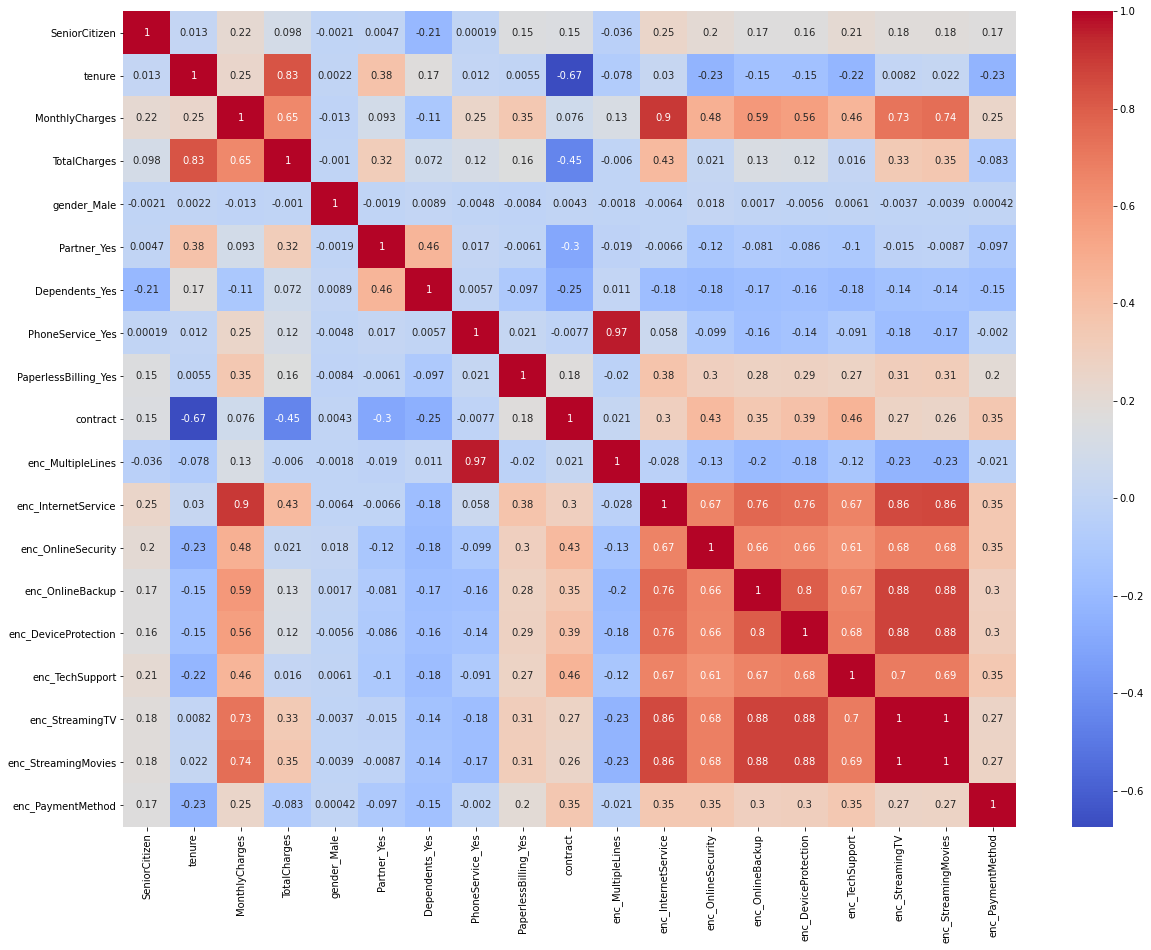

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.savefig('corr.png')

From the heatmap, we can see that:
- Highly correlated (> 0.8): 
    - "tenure", "TotalCharges"
    - "MonthlyCharges", "InternetService"
    - "PhoneService", "MultipleLines"
    - "InternetService", "StreamingTV", "StreamingMovies"
    - "OnlineBackup", "StreamingTV", "StreamingMovies"
    - "DeviceProtection", "StreamingTV", "StreamingMovies"
    
We will drop "MultipleLines", "StreamingTV", "StreamingMovies", "TotalCharges" and keep the rest. Although ("MonthlyCharges" and "InternetService") is also highly correlated, we will keep them because we need to know how much customers is paying monthly and what services they are using.

In [33]:
X_train_scale.drop([ "enc_MultipleLines", "enc_StreamingTV", "enc_StreamingMovies", 'TotalCharges'], axis=1, inplace=True)
X_test_scale.drop(["enc_MultipleLines", "enc_StreamingTV", "enc_StreamingMovies", 'TotalCharges'], axis=1, inplace=True)

In [34]:
X_train_scale.head().T

,5599,2969,3238,1058,5280
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,-0.956036,1.326485,-0.263128,-1.241351,0.022188
MonthlyCharges,1.003992,1.486217,-1.505579,0.827121,0.480053
gender_Male,1.000000,0.000000,0.000000,1.000000,0.000000
Partner_Yes,1.000000,1.000000,1.000000,1.000000,1.000000
Dependents_Yes,0.000000,1.000000,1.000000,1.000000,1.000000
PhoneService_Yes,1.000000,1.000000,1.000000,1.000000,1.000000
PaperlessBilling_Yes,1.000000,0.000000,0.000000,1.000000,1.000000
contract,0.829567,-1.565256,-1.565256,0.829567,-0.367845
enc_InternetService,0.440273,0.440273,0.216155,0.440273,0.343572


The dataset is ready for training!!!

## Training the models.

We will train a few models and choose the best performed model.

Create a function to store the metrics score and create the confusion matrix heatmap.

In [35]:
precision = []
recall = []
accuracy = []
f1 = []
auc = []
lloss = []

def report(y_test, y_pred):
    precision.append(round(precision_score(y_test, y_pred), 2))
    recall.append(round(recall_score(y_test, y_pred), 2))
    accuracy.append(round(accuracy_score(y_test, y_pred), 2))
    f1.append(round(f1_score(y_test, y_pred),2))
    auc.append(round(roc_auc_score(y_test, y_pred), 2))
    lloss.append(round(log_loss(y_test, y_pred), 2))
    print('Precision: {}\t Recall: {}\t Accuracy: {}'.format(precision[-1], recall[-1], accuracy[-1]))
    print('F1: {}\t AUC: {}\t Log-loss: {}'.format(f1[-1], auc[-1], lloss[-1]))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Ground Truth')
    return plt.show()
            

**Steps:**
- Train the model
- Test the model
- Evaluate the model and save all metrics scores in their respective list
- Use a heatamp to show the confusion matrix

**1. Logistic Regression**

Since our dataset is imbalance, we will use the "class weight" parameter to handle this problem.

In [36]:
lg = LogisticRegression(random_state=55, class_weight='balanced')

lg.fit(X_train_scale, y_train)

LogisticRegression(class_weight='balanced', random_state=55)

In [37]:
y_pred = lg.predict(X_test_scale)

Precision: 0.53	 Recall: 0.82	 Accuracy: 0.76
F1: 0.64	 AUC: 0.78	 Log-loss: 8.44


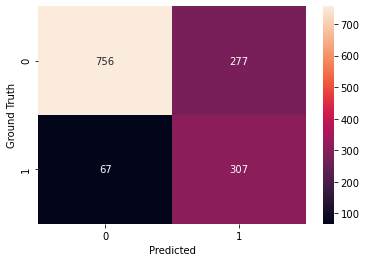

In [38]:
report(y_test, y_pred)     

**2. Decision Tree**

In [39]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=55, class_weight='balanced')

dt.fit(X_train_scale, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=55)

In [40]:
y_pred = dt.predict(X_test_scale)

Precision: 0.51	 Recall: 0.81	 Accuracy: 0.75
F1: 0.63	 AUC: 0.77	 Log-loss: 8.79


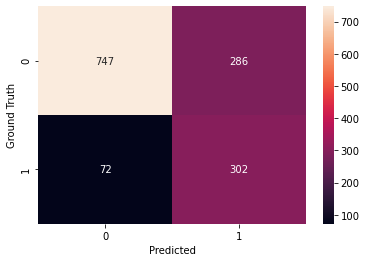

In [41]:
report(y_test, y_pred)

**3. Random forest**

In [42]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5, random_state=55, class_weight='balanced')

rf.fit(X_train_scale, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, n_estimators=10, random_state=55)

In [43]:
y_pred = rf.predict(X_test_scale)

Precision: 0.53	 Recall: 0.81	 Accuracy: 0.76
F1: 0.64	 AUC: 0.77	 Log-loss: 8.42


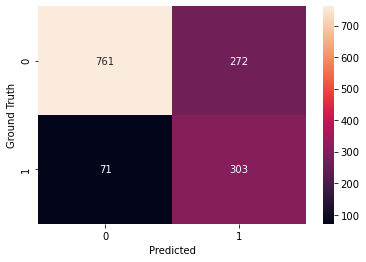

In [44]:
report(y_test, y_pred)

**4. Support Vector Machine**

In [45]:
svc = SVC(random_state=55, class_weight='balanced')

svc.fit(X_train_scale, y_train)

SVC(class_weight='balanced', random_state=55)

In [46]:
y_pred = svc.predict(X_test_scale)

Precision: 0.51	 Recall: 0.84	 Accuracy: 0.74
F1: 0.63	 AUC: 0.77	 Log-loss: 9.01


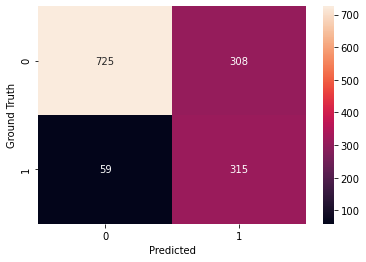

In [47]:
report(y_test, y_pred)

**5. Gradient Boosting**

There are no "class_weight" parameters in Gradient Boosting and XGBoost. We will apply "sample_weight" to the "fit.()" method instead.

Create the class weight using "class_weight" module we import from sklearn.utils.

In [48]:
classes_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [49]:
gbc = GradientBoostingClassifier(random_state=55)

gbc.fit(X_train_scale, y_train, sample_weight=classes_weight)

GradientBoostingClassifier(random_state=55)

In [50]:
y_pred = gbc.predict(X_test_scale)

Precision: 0.53	 Recall: 0.83	 Accuracy: 0.76
F1: 0.65	 AUC: 0.78	 Log-loss: 8.22


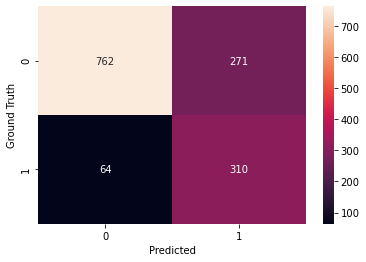

In [51]:
report(y_test, y_pred)

**6. XGBoost**

In [52]:
xgb = xgb.XGBClassifier(seed=55, objective='binary:logistic')

xgb.fit(X_train_scale, y_train, sample_weight=classes_weight)

[22:34:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=55,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=55,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
y_pred = xgb.predict(X_test_scale)

In [54]:
confusion_matrix(y_test, y_pred)

array([[812, 221],
       [103, 271]], dtype=int64)

Precision: 0.55	 Recall: 0.72	 Accuracy: 0.77
F1: 0.63	 AUC: 0.76	 Log-loss: 7.95


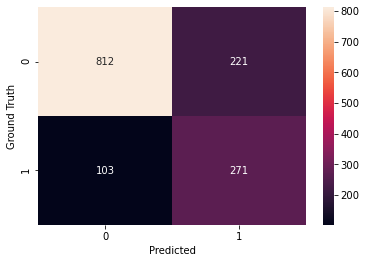

In [55]:
report(y_test, y_pred)

Create a table for all metrics score.

In [56]:
model = ['logistic', 'decision', 'random forest', 'SVM', 'gradientboost', 'xgboost']

In [57]:
table = pd.DataFrame({'model':model, 'precision':precision, 'recall':recall, 'accuracy':accuracy, 
                       'f1':f1, 'auc':auc, 'logloss':lloss})

In [58]:
table

,model,precision,recall,accuracy,f1,auc,logloss
0,logistic,0.53,0.82,0.76,0.64,0.78,8.44
1,decision,0.51,0.81,0.75,0.63,0.77,8.79
2,random forest,0.53,0.81,0.76,0.64,0.77,8.42
3,SVM,0.51,0.84,0.74,0.63,0.77,9.01
4,gradientboost,0.53,0.83,0.76,0.65,0.78,8.22
5,xgboost,0.55,0.72,0.77,0.63,0.76,7.95


From the table we can see that the scores for all models looks identical. We decide to choose our model base on recall and log-loss. Here, we will choose Gradient Boost as our final model (*SVM has best recall but worst log-loss. XGBOOST has the best log-loss but worst recall. That is why Gradient Boost is our pick).

Perform hyperparameters tuning by using GridSearchCV to find the best value for the hyperparameters.

In [59]:
para_dict_gbc = {'n_estimators':[25, 50, 75, 100, 125],           # set the hyperparameters value
                 'max_depth':[3, 5, 7, 9, 11],
                 'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25]}

In [60]:
grid_model_gbc = GridSearchCV(param_grid=para_dict_gbc, estimator=gbc, n_jobs=-1)

grid_model_gbc.fit(X_train_scale, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=55), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [25, 50, 75, 100, 125]})

In [61]:
grid_model_gbc.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}

Plug in these hyperparmeters value to the model and see how the model perform.

In [62]:
tuned_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=50, random_state=55)

tuned_model.fit(X_train_scale, y_train, sample_weight=classes_weight)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=50,
                           random_state=55)

In [63]:
y_pred = tuned_model.predict(X_test_scale)

Get the base model metrics score for comparision.

In [64]:
table.loc[[4]]

,model,precision,recall,accuracy,f1,auc,logloss
4,gradientboost,0.53,0.83,0.76,0.65,0.78,8.22


Get the tuned model metrics score.

Precision: 0.54	 Recall: 0.8	 Accuracy: 0.77
F1: 0.65	 AUC: 0.78	 Log-loss: 8.1


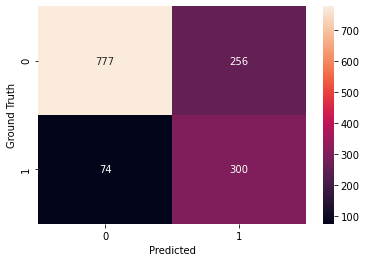

In [65]:
report(y_test, y_pred)

The log-loss and accuracy have improved but the recall score has dropped.

Take a look at the features importance.

<AxesSubplot:>

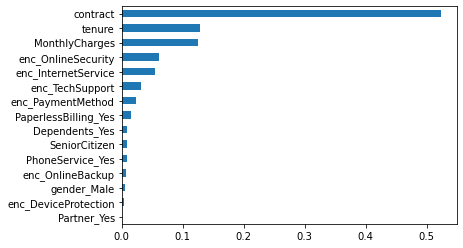

In [66]:
feat = pd.Series(tuned_model.feature_importances_, index=X_test_scale.columns)
feat.sort_values().plot(kind='barh')

As we can see, "contract" contributes the most compare to other features (more than 50%).

Although the accuracy and log-loss improved, but since we want to catch as much as possible of those customers that churned, we will want the recall score to be as high as possible (but it has dropped).

Let's tune more hyperparameters and see how the tuned model perform.

In [67]:
para_dict_gbc_2 = {'min_samples_split':[1, 3, 5, 7, 9],           # set the hyperparamters value
                 'min_samples_leaf':[12, 14 , 16, 18, 20], 
                 'max_features':['sqrt', 'log2']}

In [68]:
grid_model_gbc = GridSearchCV(param_grid=para_dict_gbc_2, estimator=tuned_model, n_jobs=-1)

grid_model_gbc.fit(X_train_scale, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_depth=5, n_estimators=50,
                                                  random_state=55),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [12, 14, 16, 18, 20],
                         'min_samples_split': [1, 3, 5, 7, 9]})

In [69]:
grid_model_gbc.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 3}

Plug in all hyperparameters we tuned with the best value into the model and see the performace.

In [70]:
best_para_gbc = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=50, max_features='sqrt', 
                                           min_samples_leaf=12, min_samples_split=3, random_state=55)

best_para_gbc.fit(X_train_scale, y_train, sample_weight=classes_weight)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='sqrt',
                           min_samples_leaf=12, min_samples_split=3,
                           n_estimators=50, random_state=55)

In [71]:
y_pred = best_para_gbc.predict(X_test_scale)

Get the base model metrics score for comparison.

In [72]:
table.iloc[[4]]

,model,precision,recall,accuracy,f1,auc,logloss
4,gradientboost,0.53,0.83,0.76,0.65,0.78,8.22


Get the scores for 2nd tuned model and compare.

Precision: 0.54	 Recall: 0.83	 Accuracy: 0.77
F1: 0.66	 AUC: 0.79	 Log-loss: 8.0


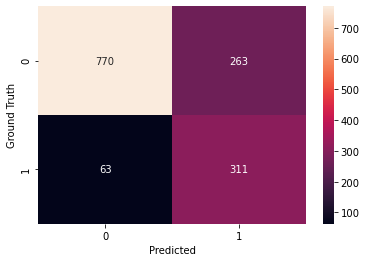

In [73]:
report(y_test, y_pred)

The recall score is back to 83%.

Take a look at the features importance.

<AxesSubplot:>

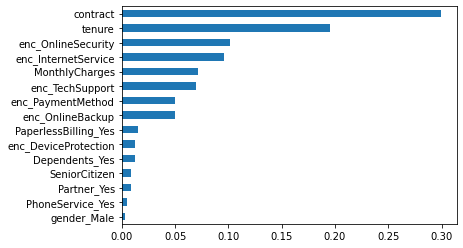

In [74]:
feat = pd.Series(best_para_gbc.feature_importances_, index=X_test_scale.columns)
feat.sort_values().plot(kind='barh')

From the 2nd tuned model, we can see that although "contract" is still the most importance feature but the weightage has reduced. The importance ranking of the other features have also changed.

Compare to the 1st tuned model, recall has improved from 80% to 83% (same as 	the base model). Log-loss has also improved by 0.1 (from 8.1 to 8.0). Although the 	accuracy has dropped from 77% to 76% but it is still same as the base model. The AUC score (which is also a good indicator that show how the model is perfoming) has also improved from 78% to 79%. Overall we are satisfied with the 2nd tuned model performance and so this will be our final model.

### Conclusion

- The count plot give us an indication on which area the company should work on to keep the customers.
- Together with features importance, the company priority now is to tie down customers who have no contract with the company.
- Depend on the management feedback, we might change our approach on the task in a few ways:
    1. Focusing on those customers that are under contract to predict if they will churned when their contract expired – remove customers without contract from the dataset since the company will be working on them.
    2. Change the threshold of the model to reduce the number of customers that actually “churn” but wrongly predicted as “stay” (improve the recall score).